# Whale Detection Challenge : Preprocess

Method overview : FFT to convert the sound tracks into spectrograms, and apply distinct preprocessing methods such as clipping, noise removal, PCEN and filters. After preprocessing we feed the spectrograms into state of the art light CNN models such as Resnet 18, VGG 16 or GoogleNet to identify right whale call patterns and perform classification. We may also try the removal of pooling layers in the networks and see if it causes better outcome.

In [0]:
import numpy as np
import aifc
import matplotlib.pyplot as plt
from matplotlib import mlab, cm
import matplotlib.ticker as plticker
import matplotlib
import pandas as pd
import pathlib
import os
import cv2
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My\ Drive/ECE\ 228\ Project
%cd data/train
%cd ../../

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/ECE 228 Project
/content/gdrive/My Drive/ECE 228 Project/data/train
/content/gdrive/My Drive/ECE 228 Project


In [0]:
%cd ../../

/content/gdrive/My Drive/ECE 228 Project


## Preprocess Section

### Preprocessing 0 : contrast-enhanced spectrograms

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


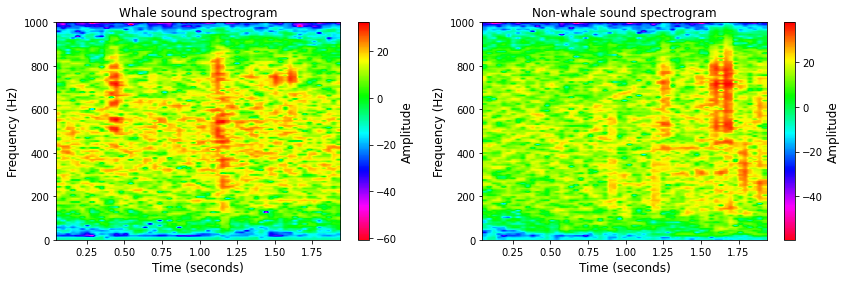

In [0]:
# ReadAIFF function
def ReadAIFF(file):
#Reads the frames from the audio clip and returns the uncompressed data '
    s = aifc.open(file,'r')
    nFrames = s.getnframes()
    strSig = s.readframes(nFrames)
    return np.fromstring(strSig, np.short).byteswap()

def plot_sbs_spectrogram(filename_whale, filename_non_whale):
    whale = ReadAIFF(filename_whale)
    nonwhale = ReadAIFF(filename_non_whale)
    plt.figure(figsize = (14,4))
    ax1 = plt.subplot(121)
    my_cmap = matplotlib.cm.get_cmap('hsv_r');
    params = {'NFFT':256, 'Fs':2000, 'noverlap':192, 'cmap' : my_cmap}
    plt.specgram(whale, **params);
    ax1.set_title('Whale sound spectrogram', fontsize = 12)
    ax1.set_xlabel('Time (seconds)', fontsize = 12)
    ax1.set_ylabel('Frequency (Hz)', fontsize = 12)
    cbar = plt.colorbar()
    cbar.set_label('Amplitude', fontsize = 12)
    ax2 = plt.subplot(122)
    plt.specgram(nonwhale, **params);
    ax2.set_title('Non-whale sound spectrogram', fontsize = 12)
    ax2.set_xlabel('Time (seconds)', fontsize = 12)
    ax2.set_ylabel('Frequency (Hz)', fontsize = 12)
    cbar = plt.colorbar()
    cbar.set_label('Amplitude', fontsize = 12)
    plt.show()
   
# Compare several examples:
path_data='./data/'
#plot_sbs_spectrogram(path_data + 'train/train24.aiff', path_data + 'train/train1315.aiff')

In [0]:
# transform all aiffs to np.ndarray and save
def to_specarray(filename):
    data = ReadAIFF(filename)
    my_cmap = matplotlib.cm.get_cmap('hsv_r');
    params = {'NFFT':256, 'Fs':2000, 'noverlap':192, 'cmap' : my_cmap}
    spectrum,freq,t,im =plt.specgram(data, **params);
    #print(type(np.transpose(spectrum)))
    #print(np.transpose(spectrum).shape)
    return np.transpose(spectrum)

### Preprocessing 1 : filter

In [0]:
# Convolution and then filter
def preprocessing(P,inner=3,vouter=59,houter=32,maxM=50,norm=True):
    Q=P.copy()
    Q=cv2.fastNlMeansDenoising(Q)
    m,n=Q.shape
    if(norm):
        mval,sval=np.mean(Q[:maxM,:]),np.std(Q[:maxM,:])
        # Extreme values are capped to mean ± 1.5 std
        fact_=1.5
        upper=mval+fact_*sval   
        lower=mval-fact_*sval
        Q[Q>upper]=upper
        Q[Q<lower]=lower
    wInner=np.ones(inner)
    vOuter=np.ones(vouter)
    hOuter=np.ones(houter)
    #convolution
    #for i in range(n):
    #    Q[:,i]=Q[:,i]-(np.convolve(Q[:,i],vOuter,'same')-np.convolve(Q[:,i],wInner,'same'))/(vouter-inner)
    #for i in range(m):
    #    Q[i,:]=Q[i,:]-(np.convolve(Q[i,:],hOuter,'same')-np.convolve(Q[i,:],wInner,'same'))/(houter-inner)

    return Q[:maxM,:]

~~###  Preprocessing 2 : noise removal~~ #combine with P1


###  Preprocessing 3 : PCEN 

### Preprocessing 4 : template matching

###  Preprocessing 5 : clipping

### Save proprocess data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


OSError: ignored

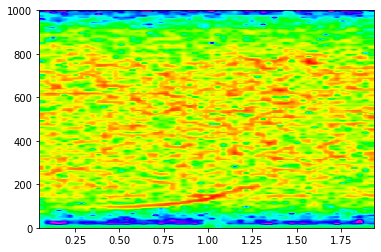

In [0]:
train_dir = './data/train/'
test_dir = './data/test/'
train_spec_dir = './data/train_spec/'
test_spec_dir = './data/test_spec/'
def save_transformed_data(src_dir,dst_dir):
    for filename in os.listdir(src_dir):
        if filename.endswith(".aiff"): 
            #print(filename)
            src_path=os.path.join(src_dir,filename)
            dst_path=os.path.join(dst_dir,filename[:-5]+".png")
            #print(src_path)
            #print(dst_path)
            matplotlib.image.imsave(dst_path,to_specarray(src_path))
            
save_transformed_data(train_dir,train_spec_dir)
save_transformed_data(test_dir,test_spec_dir)

In [0]:
# kalvin
train_spec_dir = './data/train_spec/'
test_spec_dir = './data/test_spec/'
train_filt_dir = './data/train_filter/'
test_filt_dir = './data/test_filter/'
#cv2.fastNlMeansDenoising()
def save_transformed_data(src_dir,dst_dir):
    for filename in os.listdir(src_dir):
        try:
            dst_path=os.path.join(dst_dir,filename[:-4]+".png")
            a=cv2.imread(src_dir+filename,0)       
            matplotlib.image.imsave(dst_path,preprocessing(a))
        except:
            print(filename)
        #break
save_transformed_data(train_spec_dir,train_filt_dir)
print('train finished')
save_transformed_data(test_spec_dir,test_filt_dir)
print('test finished')
